# Task 1.2: Prediction with LSTM

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.load_data import get_data
from src.train import FederatedLearning
from src.config import Config, load_train_config

import torch
torch.manual_seed(102)

## Specify parameters

### Manually set config

In [3]:
kwargs = {
    # Main mode
    "mode": "prediction",

    # Model config
    "model": "LSTM",
    "hidden_dim": 50,
    "num_layers": 1,
    "dropout": 0.0,

    # Training config
    "epochs": 500,
    "lr": 1e-3,
    "batch_size": 128
}

config = Config(**kwargs)

In [4]:
# Save config
#config.save("default_pred_lstm")

### Load saved config

In [5]:
config = load_train_config("config_default_pred_lstm")
print(config)

Config loaded from: config/config_default_pred_lstm.json
CONFIG:
  mode: prediction
  test_size: 0.2
  val_size: 0.1
  shuffle: True
  seed: 42
  model: LSTM
  input_dim: 1
  hidden_dim: 50
  output_dim: 1
  num_layers: 1
  dropout: 0.0
  epochs: 500
  lr: 0.001
  batch_size: 128
  eval_steps: 50


## Run FL training

In [6]:
x_train, x_val, x_test, y_train, y_val, y_test = get_data(config)

In [7]:
fl = FederatedLearning(config)
fl.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 134.55721, val loss: 667.81061
  Epoch: 50,  train loss: 37.65785, val loss: 384.37152
  Epoch: 100,  train loss: 24.84744, val loss: 66.64326
  Epoch: 150,  train loss: 17.40221, val loss: 49.78124
  Epoch: 200,  train loss: 14.99025, val loss: 47.94484
  Epoch: 250,  train loss: 15.16775, val loss: 47.09030
  Epoch: 300,  train loss: 24.46864, val loss: 47.27565
  Epoch: 350,  train loss: 16.25002, val loss: 46.79767
  Epoch: 400,  train loss: 13.68248, val loss: 46.54924
  Epoch: 450,  train loss: 19.09192, val loss: 46.47156
  Epoch: 500,  train loss: 15.54236, val loss: 46.93902
  Needed  1.10 minutes for training


NOTE: Execution time of LSTM a bit longer than of RNN!

### Analysis

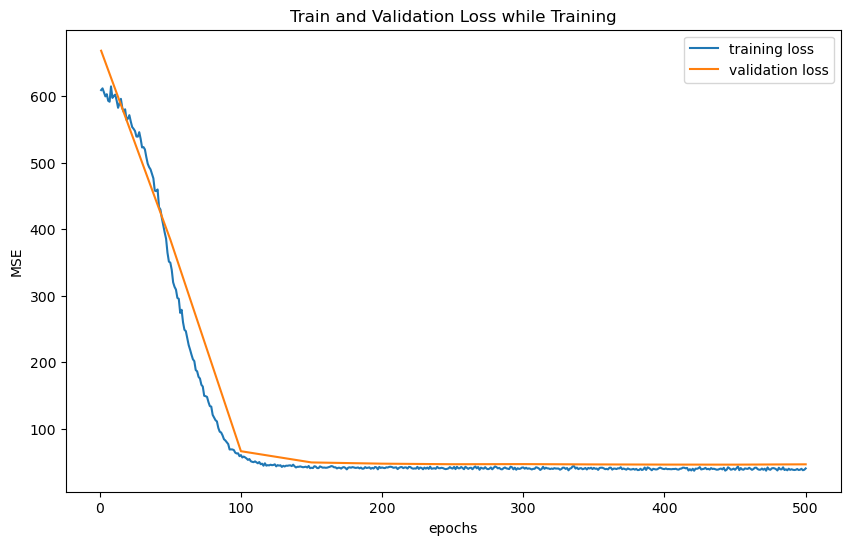

In [8]:
fl.plot_training_loss()

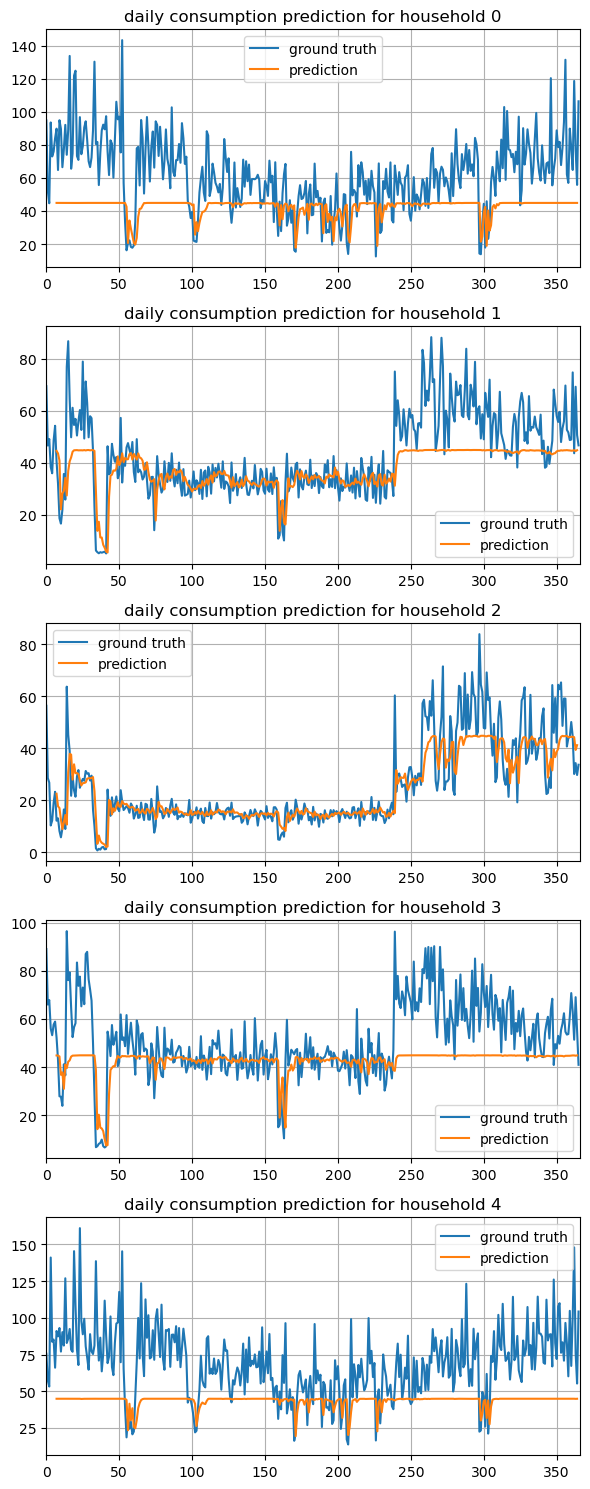

In [9]:
# TODO add "simulation plot": "show the predicted output vs. ground truth during the model training and testing"
fl.plot_daily_consumption_prediction()

In [10]:
y_pred = fl.evaluation_metrics(x_test, y_test)

METRICS:
  Mean model Test MSE:  173.2198944091797
  Mean model Test RMSE: 13.16130256652832
  Model Test MSE:       47.87751770019531
  Model Test RMSE:      6.919358253479004


## Run training with aggregated data

In [11]:
x_train, x_val, x_test, y_train, y_val, y_test = get_data(config)

# Stack data to aggregate all households to one
x_train, x_val, x_test = [arr.reshape(1, arr.shape[0] * arr.shape[1], arr.shape[2]) for arr in [x_train, x_val, x_test]]
y_train, y_val, y_test = [arr.reshape(1, arr.shape[0] * arr.shape[1]) for arr in [y_train, y_val, y_test]]

In [12]:
fl_agg = FederatedLearning(config)
fl_agg.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 595.70300, val loss: 660.94922
  Epoch: 50,  train loss: 339.40134, val loss: 350.84207
  Epoch: 100,  train loss: 70.90879, val loss: 72.15984
  Epoch: 150,  train loss: 63.69942, val loss: 51.24822
  Epoch: 200,  train loss: 37.34792, val loss: 50.93993
  Epoch: 250,  train loss: 29.64181, val loss: 49.18630
  Epoch: 300,  train loss: 33.59486, val loss: 49.62265
  Epoch: 350,  train loss: 36.54227, val loss: 50.65663
  Epoch: 400,  train loss: 44.17395, val loss: 47.89512
  Epoch: 450,  train loss: 26.30358, val loss: 48.01654
  Epoch: 500,  train loss: 51.33370, val loss: 48.64881
  Needed  0.04 minutes for training


### Analysis

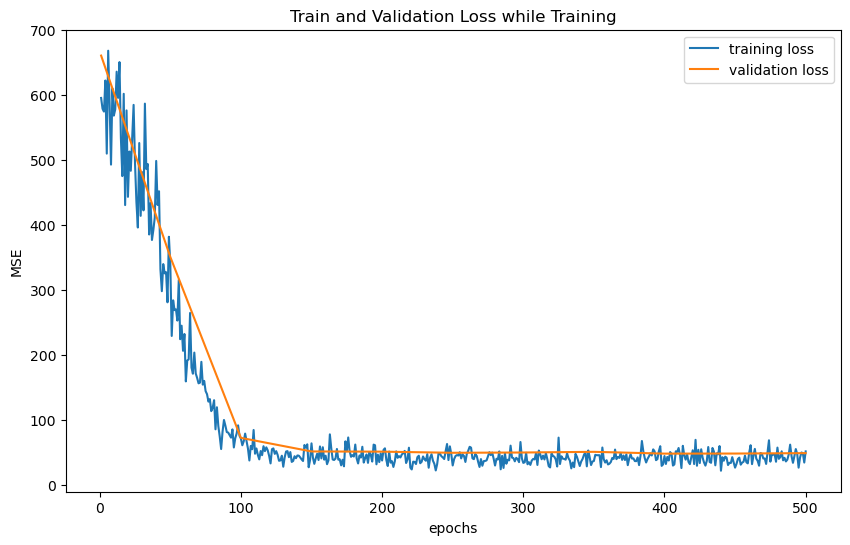

In [13]:
fl_agg.plot_training_loss()

In [14]:
fl_agg.evaluation_metrics(x_test, y_test)

METRICS:
  Mean model Test MSE:  173.2198944091797
  Mean model Test RMSE: 13.16130256652832
  Model Test MSE:       48.274105072021484
  Model Test RMSE:      6.9479570388793945


tensor([[19.5717],
        [41.3583],
        [36.2231],
        ...,
        [ 5.7793],
        [ 6.5080],
        [ 3.3991]])